In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

import IPython.display as disp

# Uneigentliche Integrale

<span style="font-size: 48pt">
$$
n! = \int_0^\infty x^n e^{-x} \,dx
$$
</span>

*Jochen Illerhaus*

# ETIT HM1 H15 3c (3 Punkte)

Zeigen Sie, dass das uneigentliche Integral

$$
    \int_1^\infty \frac{\cos(2x)}{x} \,dx
$$

konvergent ist.

-------------


# ETIT HM1 H16 3c (3 Punkte)

Untersuchen Sie das folgende uneigentliche Integral auf Konvergenz und auf absolute
Konvergenz:

$$
\int_0^\infty \frac{1+\sin(x)}{\sqrt{x}(1+x)} \,dx
$$

In [2]:
def plot(title, func, a, b, symbols=["f(x)", "F(x)"], ylims=None):
    x = np.linspace(a, b, 400)
    plt.figure(figsize=(16, 7))
    opts = dict(linewidth=5)
    if isinstance(func, list):
        for i, f in enumerate(func):
            plt.plot(x, f(x), label="$%s$" % symbols[i], **opts)
        plt.legend()
    else:
        plt.plot(x, func(x), **opts)
    if ylims is not None:
        plt.ylim(ylims)
    if isinstance(title, list):
        s = ""
        ENDSTR = "\\; \\; \\; ; \\; \\; \\;"
        for i, t in enumerate(title):
            s += "%s = %s %s" % (symbols[i], t, ENDSTR)
        title = s[:len(s)-len(ENDSTR)]
    disp.display(disp.HTML(
        "<span style=\"display: block; font-size: 25px; text-align: center;\">$%s$</span>" % title))

In [80]:
def intPlot(title, func, a, b, **kwargs):
    plot([title, "\\int_%a^x %s d\\tilde{x}" % (a, title.replace("x", "\\tilde{x}"))],
         [func, lambda x: np.array([integrate.quad(func, 1, X)[0] for X in x])], a, b, **kwargs)
    
def intText(title, func, a, b):
    d = {np.inf: "\\infty", (-np.inf): "-\\infty"}
    sci = lambda f, ff: (("%"+ff+"e")%f).replace("e", "\cdot 10^{") + "}"
    y, dy = integrate.quad(func, a, b)
    disp.display(disp.HTML(("<span style=\"display: block; font-size: 18px; text-align: center;\">" +
                           "$\\int_{%s}^{%s} %s \\,d \\tilde{x}" + 
                           " \\; \\approx \\; %s \\; \\pm  %s $</span>" ) % 
                           (a, d.get(b, b), title.replace("x", "\\tilde{x}"), 
                            sci(y, "+2.2"), sci(np.abs(dy/2), "1.1"))))
    
def intFull(title, func, a, b, c, **kwargs):
    with np.warnings.catch_warnings():
        np.warnings.filterwarnings('ignore')
        args = [title, func, a]
        intPlot(*args, b, **kwargs)
        intText(*args, np.inf)

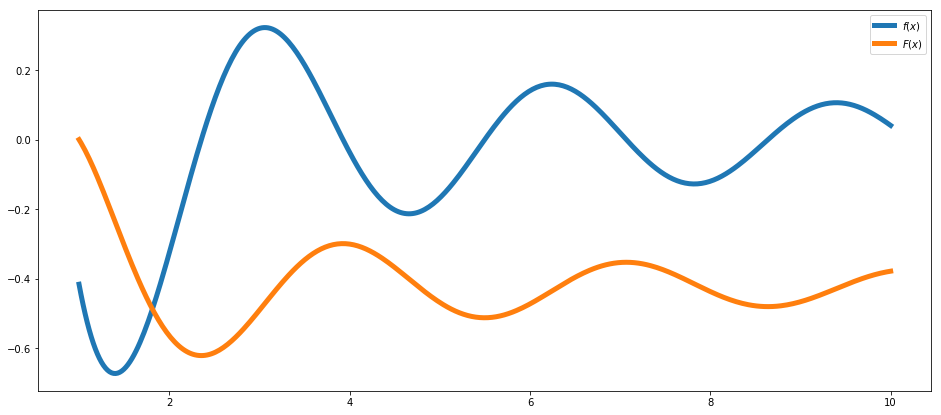

In [85]:
intPlot("\\frac{\cos(2x)}{x}", lambda x: np.cos(2*x)/x, 1, 10)
disp.display(disp.HTML("<span style=\"display: block; font-size: 18px; text-align: center;\">" +
                           "$\\int_1^\\infty \\frac{\cos(2\\tilde{x})}{\\tilde{x}} \\,d \\tilde{x}" + 
                           " \\; = -\\mathrm{Ci}(2) \\approx -0.42 $</span>"))

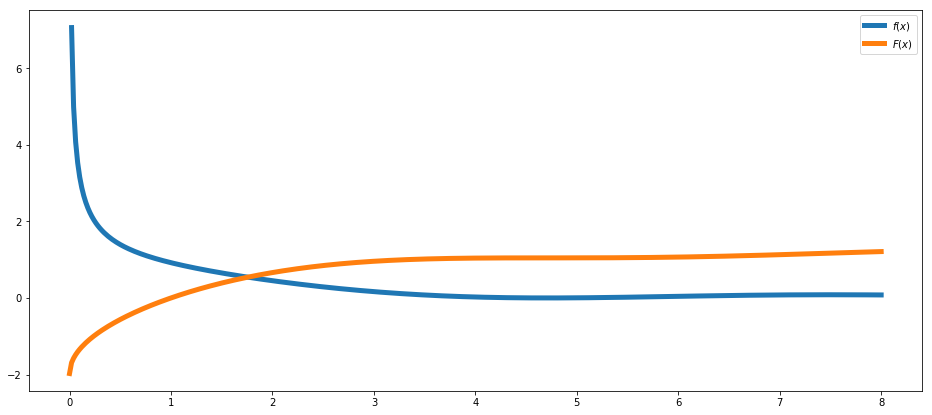

In [81]:
intFull("\\frac{1+\\sin(x)}{\\sqrt{x} (1+x)}", lambda x: (1+np.sin(x))/(np.sqrt(x)*(1+x)), 0, 8, np.inf)

# ETIT HM1 F16 3b (2+2+2 Punkte)

Untersuchen Sie, ob die folgenden Integrale existieren. Berechnen Sie diese gegebenenfalls:

\begin{align}
\textbf{(i)} \;\;\;\; & \int_0^1 \frac{e^x}{x} \,dx 
\\
\textbf{(ii)} \;\;\;\; & \int_1^e \frac{\sin\big(\pi \ln(x)\big)}{x} \,dx
\\
\textbf{(iii)} \;\;\;\; & \int_0^\infty \big( 1+2x \big) e^{-x} \,dx
\end{align}

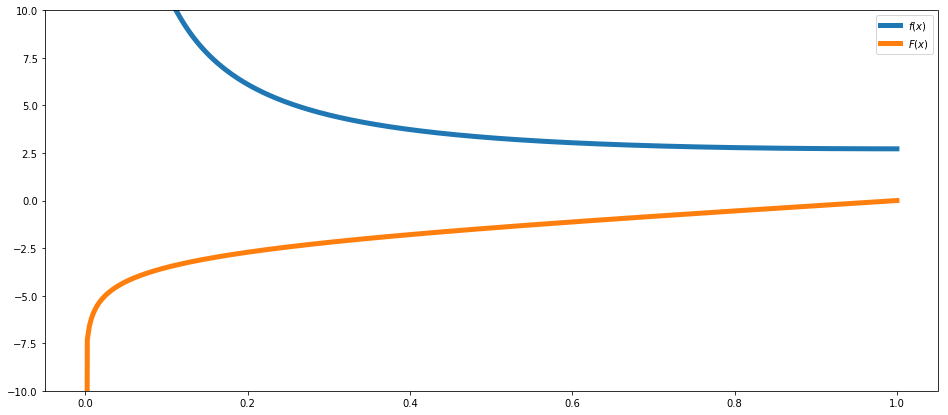

In [82]:
with np.warnings.catch_warnings():
    np.warnings.filterwarnings('ignore')
    intPlot("\\frac{e^x}{x}", lambda x: np.exp(x)/x, 0, 1, ylims=[-10, 10])

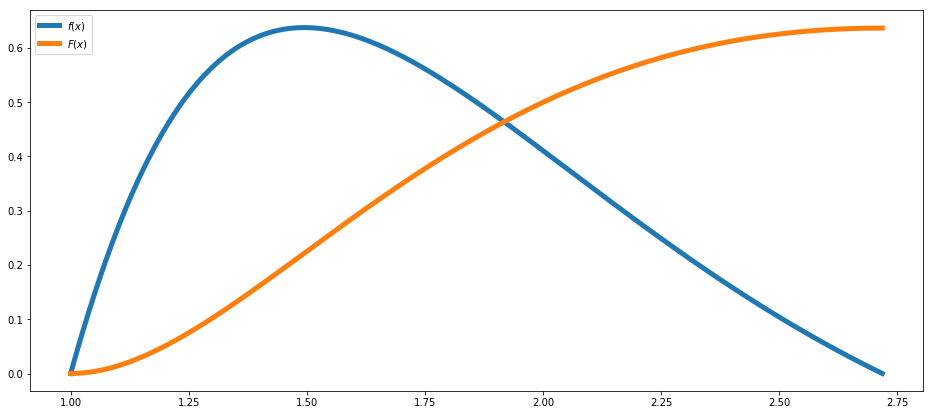

In [83]:
intFull("\\frac{\\sin(\\pi \\ln(x))}{x}", lambda x: np.sin(np.pi*np.log(x))/x, 1, np.exp(1), np.exp(1))

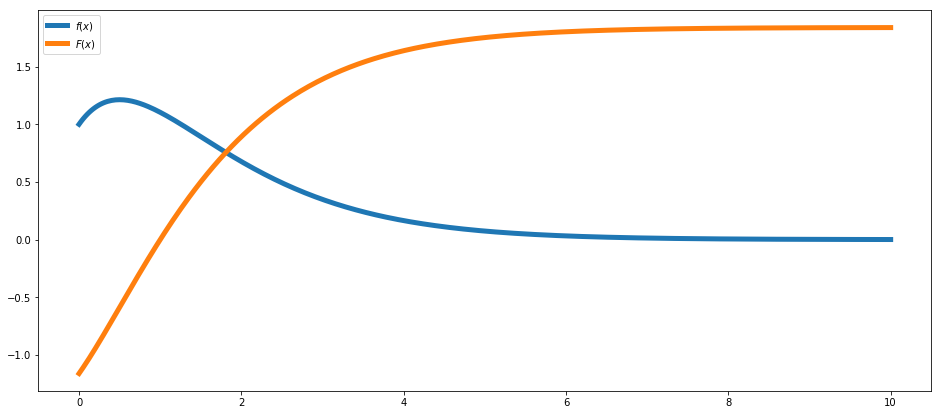

In [84]:
intFull("(1+2x) e^{-x}", lambda x: (1+2*x)*np.exp(-x), 0, 10, np.inf)